In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [67]:
df = pd.read_csv('../data/final/wrangled/main.csv')
df.head()

,year,immigration,height,evi,polarization,population,wagegdpratio,hsus,instability,age
0,1815,1.397797,172.932432,42.730802,0.630059,8439167.0,1.356598,19.812750,-0.464922,52.303344
1,1816,1.409010,172.924227,43.050512,0.570889,8679024.0,1.526536,19.894974,-0.494612,52.115139
2,1817,1.424428,172.916023,43.541200,0.472200,8918881.0,1.358445,19.931601,-2.132884,52.039758
3,1818,1.437043,172.904089,44.180841,0.356102,9158739.0,1.277825,20.024040,-2.160909,51.964377
4,1819,1.452460,172.907819,44.758390,0.256378,9398596.0,1.297731,20.106363,-2.188171,51.822763


# Feature Engineering

In [68]:
# Normalize evi value on a log scale
df['evi'] = np.log(df['evi'])
df = df.rename(columns={'evi': 'evi_log'})

In [69]:
# The additive differences are subtracted while the multiplicative ones are divided
add_vars = ['height', 'age', 'polarization', 'evi_log']
mult_vars = [v for v in df.columns if v not in add_vars+['year', 'instability']]
# Calculate yearly differences for each variable
for v in add_vars:
    df[v+'_diff'] = df[v].diff()
for v in mult_vars:
    df[v+'_diff'] = df[v].pct_change()
# Drop the first row since it has NaN values
df = df.dropna()

# Normalization

In [70]:
from sklearn.preprocessing import StandardScaler

# Standardize all x columns
cols_to_standardize = [col for col in df.columns if col not in ['year', 'instability']]
scaler = StandardScaler()
df[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])

In [71]:
df.to_csv('../data/final/wrangled/normalized.csv', index=False)

# Exploratory Data Analysis

In [72]:
from sklearn.linear_model import LinearRegression

def plot(col):
    X = df[[col]]
    y = df['instability']
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = model.score(X, y)
    
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='red')
    plt.text(0.1, 0.1, f'R^2={r2:.2f}', transform=plt.gca().transAxes, color='red')
    plt.xlabel(col)
    plt.ylabel('instability')
    plt.show()

There are some linear trends here and there:

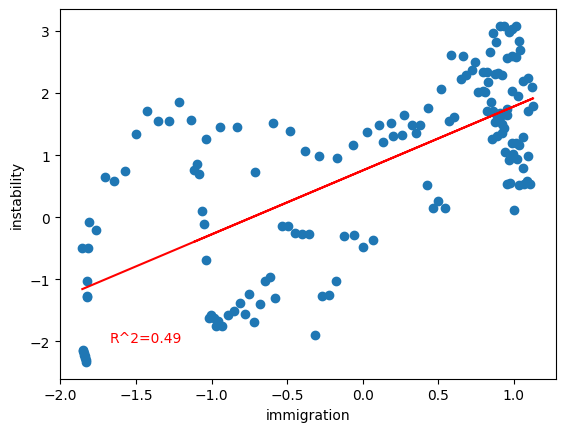

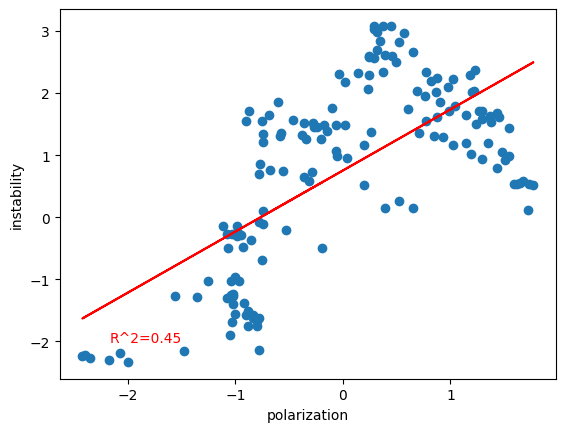

In [73]:
plot('immigration')
plot('polarization')

There are also non-linear trends visible in graphs but not through 2d regression:

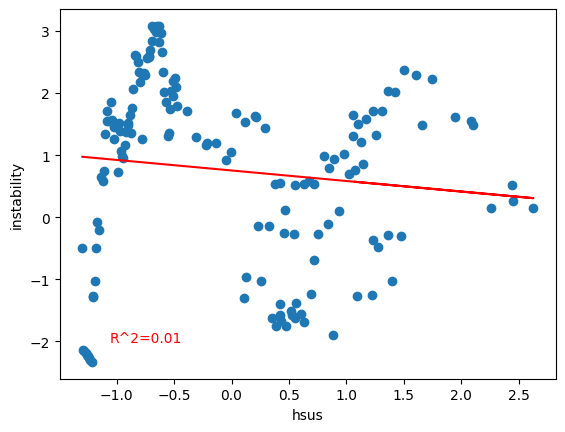

In [74]:
plot('hsus')

There are also variables that, on their own, does not exhibit any logical trend, but might work well in combination with other variables.

> **_NOTE:_**  Question for reflection: how do I know that the model is not just remembering the population data but finding interesting pattern? Like a model trained on US population might not work well for other countires because it has simply 'memorized' US history.

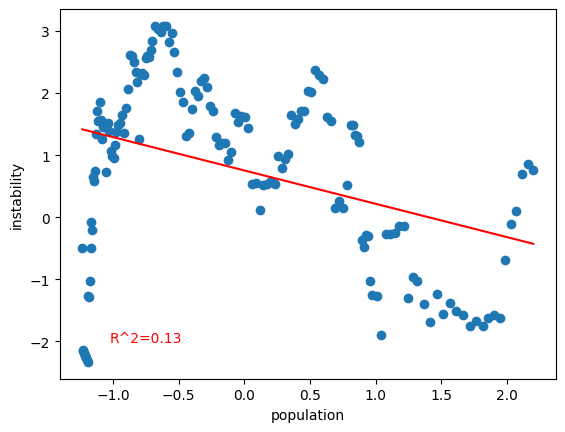

In [75]:
plot('population')

These relationship prompt us to try both linear and non-linear models on the variables.